In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame,Series
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)
# prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})
# prices.hist()



In [50]:
#data = pd.read_csv('‪D:\Data\UCI Datasets\winequality-red.csv',sep = ';')
train = pd.read_csv('../Housing_prices/train.csv')
test = pd.read_csv('../Housing_prices/test.csv')
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))

In [4]:
train.shape,test.shape

((1460, 81), (1459, 80))

In [5]:
train.head(1)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500


In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
#check for dupes for Id
idsUnique = len(set(train.Id))
idsTotal = train.shape[0]
idsdupe = idsTotal - idsUnique
print(idsdupe)
#drop id col
train.drop(['Id'],axis =1,inplace=True)

0


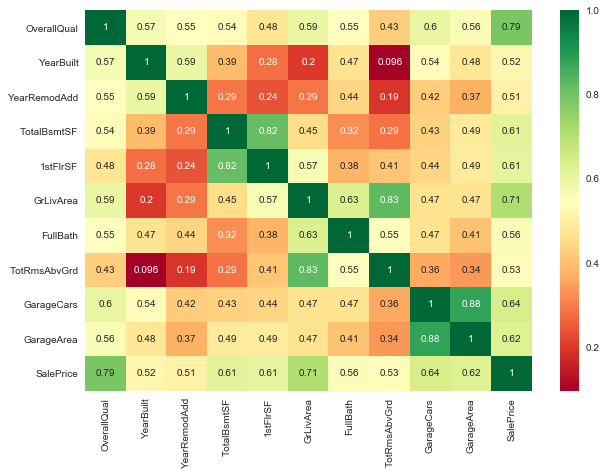

In [8]:
# most correlated features
corrmat = train.corr()
plt.figure(figsize = (10,7))
# or fig, ax = plt.subplots(figsize=(20, 10))
top_corr_features = corrmat.index[abs(corrmat["SalePrice"])>0.5]
g = sns.heatmap(train[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Check Which column contributes more to null Values

In [9]:
train_nas = train.isnull().sum()
train_nas = train_nas[train_nas>0]
train_nas.sort_values(ascending=False)[:7]

PoolQC         1453
MiscFeature    1406
Alley          1369
Fence          1179
FireplaceQu     690
LotFrontage     259
GarageYrBlt      81
dtype: int64

In [10]:
test_nas = test.isnull().sum()
test_nas = test_nas[test_nas>0]
test_nas.sort_values(ascending = False)[:7]

PoolQC         1456
MiscFeature    1408
Alley          1352
Fence          1169
FireplaceQu     730
LotFrontage     227
GarageYrBlt      78
dtype: int64

### Find most important features relative to target

In [11]:
corr = train.corr()
corr

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.049900,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.072319,-0.050117,1.000000,...,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [12]:
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64


### Differentiate numerical features (minus the target) and categorical features

In [13]:
categorical_features = train.select_dtypes(include=['object']).columns
categorical_features

Index([u'MSZoning', u'Street', u'Alley', u'LotShape', u'LandContour',
       u'Utilities', u'LotConfig', u'LandSlope', u'Neighborhood',
       u'Condition1', u'Condition2', u'BldgType', u'HouseStyle', u'RoofStyle',
       u'RoofMatl', u'Exterior1st', u'Exterior2nd', u'MasVnrType',
       u'ExterQual', u'ExterCond', u'Foundation', u'BsmtQual', u'BsmtCond',
       u'BsmtExposure', u'BsmtFinType1', u'BsmtFinType2', u'Heating',
       u'HeatingQC', u'CentralAir', u'Electrical', u'KitchenQual',
       u'Functional', u'FireplaceQu', u'GarageType', u'GarageFinish',
       u'GarageQual', u'GarageCond', u'PavedDrive', u'PoolQC', u'Fence',
       u'MiscFeature', u'SaleType', u'SaleCondition'],
      dtype='object')

In [14]:
numerical_features = train.select_dtypes(exclude=['object']).columns
numerical_features

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallQual',
       u'OverallCond', u'YearBuilt', u'YearRemodAdd', u'MasVnrArea',
       u'BsmtFinSF1', u'BsmtFinSF2', u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF',
       u'2ndFlrSF', u'LowQualFinSF', u'GrLivArea', u'BsmtFullBath',
       u'BsmtHalfBath', u'FullBath', u'HalfBath', u'BedroomAbvGr',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'GarageCars', u'GarageArea', u'WoodDeckSF', u'OpenPorchSF',
       u'EnclosedPorch', u'3SsnPorch', u'ScreenPorch', u'PoolArea', u'MiscVal',
       u'MoSold', u'YrSold', u'SalePrice'],
      dtype='object')

In [15]:
categorical_features.size,numerical_features.size

(43, 37)

### Remove Target Variable

In [16]:
numerical_features = numerical_features.drop("SalePrice")


### Handle remaining missing values for numerical features by using median as replacement

In [17]:
train_num = train[numerical_features]
train_cat = train[categorical_features]

In [51]:
all_num = all_data[numerical_features]
all_cat = all_data[categorical_features]

In [52]:

print("NAs for numerical features in whole data : " + str(all_num.isnull().values.sum()))
all_num = all_num.fillna(all_num.mean())
print("Remaining NAs for numerical features in train : " + str(all_num.isnull().values.sum()))

NAs for numerical features in whole data : 678
Remaining NAs for numerical features in train : 0


In [18]:

print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.mean())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 348
Remaining NAs for numerical features in train : 0


### Look for Skewnwss

In [53]:
from scipy.stats import skew 
skewness = all_num.apply(lambda x: skew(x.dropna()))
skewness = skewness[abs(skewness) > 0.5]
skewness.index
skew_features = all_num[skewness.index]
skew_features  = np.log1p(skew_features)
all_num[skewness.index] = skew_features

In [57]:
all_cat = pd.get_dummies(all_cat)


In [58]:
all_cat.shape

(2919, 252)

In [59]:
all_data = pd.concat([all_cat,all_num],axis=1)


In [60]:
all_data.shape

(2919, 288)

In [61]:
train.shape

(1460, 81)

In [63]:
test.shape

(1459, 80)

### creating matrices for sklearn:
 

In [54]:
skewness = train_num.apply(lambda x: skew(x.dropna()))
skewness[abs(skewness) > 0.5].sort_values(ascending=False)
skewness = skewness[abs(skewness) > 0.5]
skewness.index
skew_features = train[skewness.index]
skew_features.columns

Index([u'MSSubClass', u'LotFrontage', u'LotArea', u'OverallCond', u'YearBuilt',
       u'YearRemodAdd', u'MasVnrArea', u'BsmtFinSF1', u'BsmtFinSF2',
       u'BsmtUnfSF', u'TotalBsmtSF', u'1stFlrSF', u'2ndFlrSF', u'LowQualFinSF',
       u'GrLivArea', u'BsmtFullBath', u'BsmtHalfBath', u'HalfBath',
       u'KitchenAbvGr', u'TotRmsAbvGrd', u'Fireplaces', u'GarageYrBlt',
       u'WoodDeckSF', u'OpenPorchSF', u'EnclosedPorch', u'3SsnPorch',
       u'ScreenPorch', u'PoolArea', u'MiscVal'],
      dtype='object')

## skewness treatment using log transformation

In [55]:
skew_features  = np.log1p(skew_features)

In [56]:
skew_features.isnull().values.sum()

348

In [24]:
#train_num[skewness.index] = skew_features

In [25]:
print("NAs for numerical features in train : " + str(train_num.isnull().values.sum()))
train_num = train_num.fillna(train_num.mean())
print("Remaining NAs for numerical features in train : " + str(train_num.isnull().values.sum()))

NAs for numerical features in train : 0
Remaining NAs for numerical features in train : 0


In [26]:
train_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


### Create dummy features for categorical values via one-hot encoding

In [27]:
train_cat = pd.get_dummies(train_cat)
train_cat.shape

(1460, 252)

In [28]:
train_cat.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave,LotShape_IR1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [29]:
train_cat.isnull().values.sum()

0

### Concatinate categorical(after dummies) and numerical features

In [30]:
train1 = pd.concat([train_cat,train_num],axis=1)
train1.shape

(1460, 288)

In [31]:
target = train['SalePrice']

### Residual plot

In [32]:

# plt.scatter(train_pre, train_pre - y_train, c = "blue",  label = "Training data")
# plt.scatter(test_pre,test_pre - y_test, c = "black",  label = "Validation data")
# plt.title("Linear regression")
# plt.xlabel("Predicted values")
# plt.ylabel("Residuals")
# plt.legend(loc = "upper left")
# plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
# plt.show()

### Train Test Split

In [48]:
train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [46]:
from sklearn.model_selection import train_test_split # to split the data into two parts
X_train,X_test,y_train,y_test = train_test_split(train,target, random_state = 0)
#Fill the training and test data with require information
# X_train = train[features] 
# y_train = train[target]
# X_test = test[features]
# y_test = test[target]


In [34]:
# from sklearn.preprocessing import MinMaxScaler
# sc = MinMaxScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

## Ridge Regression (RidgeCV)

In [73]:
#For All Data   
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice
train["SalePrice"] = np.log1p(train["SalePrice"])
y_train = train['SalePrice']


In [74]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train,y_train)
alpha = ridge.alpha_
print('best alpha',alpha)
print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4],cv = 5)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)
# print("Ridge RMSE on Training set :", rmse_CV_train(ridge).mean())
# print("Ridge RMSE on Test set :", rmse_CV_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)
ridge.score(X_test,y_test)

('best alpha', 6.0)
Try again for more precision with alphas centered around 6.0
('Best alpha :', 8.3999999999999986)


1.0

In [75]:
y_test_rdg = ridge.predict(X_test)
df = pd.DataFrame(data = y_test_rdg,columns = ['SalePrice'])
df['Id'] = test['Id']
df = df[['Id','SalePrice']]
df['SalePrice'] = df['SalePrice'].map('{:.2f}'.format)

In [76]:
df.to_csv('output_HP.csv', sep=',',index = False) 

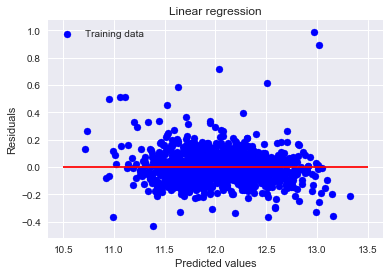

In [77]:
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue",  label = "Training data")
#plt.scatter(y_test_rdg,y_test_rdg - y_test, c = "green",  label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

## Cross Validation (Extremely Important)

In [88]:

from sklearn.model_selection import cross_val_score

def rmse_cv(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv = 5))
    return(rmse)

In [89]:
from sklearn.linear_model import Ridge
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
cv_ridge = [rmse_cv(Ridge(alpha = alpha)).mean() 
            for alpha in alphas]

In [90]:
cv_ridge

[0.13947631816020367,
 0.13848615807386891,
 0.13584975240836555,
 0.13211266082155876,
 0.12922633808584189,
 0.12836421972448583,
 0.12797600888098271,
 0.12834001428446112,
 0.13033166245809277,
 0.13302655253969198,
 0.13585345248225425]

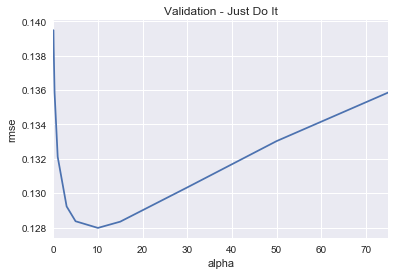

In [91]:
cv_ridge = pd.Series(cv_ridge, index = alphas)
cv_ridge.plot(title = "Validation - Just Do It")
plt.xlabel("alpha")
plt.ylabel("rmse")

In [92]:
cv_ridge.min()

0.12797600888098271

In [93]:
linridge = Ridge(alpha=12.797).fit(X_train, y_train)

In [98]:
linridge.score(X_train, y_train)

print('Housing Prices dataset')

print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
# print('ridge regression features: {}'
#      .format(features))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train, y_train)))
# print('R-squared score (test): {:.3f}'
#      .format(linridge.score(X_test, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))
print('Number of zero features: {}'
     .format(np.sum(linridge.coef_ == 0)))

Housing Prices dataset
ridge regression linear model intercept: 12.9450578051
ridge regression linear model coeff:
[ -1.31643168e-01   4.76324832e-02   3.55021538e-02   3.86594145e-02
   9.84911605e-03  -2.35188856e-02   2.35188856e-02  -1.46994065e-03
   2.24773845e-02   6.91709961e-03   2.12145596e-02  -3.61004007e-02
   7.96874146e-03  -3.25491456e-02   2.11532205e-02  -3.05028379e-03
   1.44462089e-02   1.11515459e-02  -1.11515459e-02   1.17596089e-02
   3.48141557e-02  -2.97334584e-02  -1.58107031e-02  -1.02960311e-03
  -6.15079539e-03   1.59035973e-02  -9.75280195e-03  -8.37432305e-04
  -5.26824800e-04   2.56042836e-03   1.64596573e-02   3.16304608e-02
  -1.50122873e-02   8.51224292e-02  -7.42030163e-02  -2.66051834e-02
  -5.79192011e-02  -4.31815100e-02  -4.01264282e-02  -2.14310270e-02
  -9.20852630e-04  -3.20865266e-02   7.00402420e-02   6.01691591e-02
  -4.42792887e-02   9.96697751e-04  -2.04698205e-02  -1.12491904e-02
   3.62719141e-02   8.25673532e-02  -1.23790021e-02   1.5

## np.expm1

In [108]:
predictions = np.expm1(linridge.predict(X_test))
df = pd.DataFrame(data = predictions,columns = ['SalePrice'])
df['Id'] = test['Id']
df = df[['Id','SalePrice']]
df['SalePrice'] = df['SalePrice']#.map('{:.2f}'.format)
df.to_csv('output_HP.csv', sep=',',index = False)
df.head()


,Id,SalePrice
0,1461,118795.907489
1,1462,156397.032551
2,1463,181206.925648
3,1464,194997.914151
4,1465,202280.899286


### Lasso Regression 

In [110]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


#lasso = Lasso(random_state=0)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 3
#lasso_cv = LassoCV(alphas=alphas, random_state=0)
lasso_cv = LassoCV(alphas = [1, 0.1, 0.001, 0.0005]).fit(X_train, y)

lasso_cv.fit(X_train, y_train)
lasso_cv.score(X_train, y_train)
#lasso_cv.predict(X_test)

0.9295027704477985

### Root Mean Squared Error ([0,1])

In [133]:
cv_lasso = rmse_cv(lasso_cv)

In [135]:
cv_lasso.mean()

0.12409536641753985

## Coeff of Features 

In [115]:
coef = pd.Series(lasso_cv.coef_, index = X_train.columns)


In [116]:
coef.head()

MSZoning_C (all)   -0.295728
MSZoning_FV         0.009248
MSZoning_RH         0.000000
MSZoning_RL         0.000000
MSZoning_RM        -0.031671
dtype: float64

### WOW LASSO

In [117]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 114 variables and eliminated the other 174 variables


## TOP 10 Important and worst Features according to Lasso

In [119]:
imp_coef = pd.concat([coef.sort_values().head(10),
                     coef.sort_values().tail(10)])

In [121]:
imp_coef

RoofMatl_ClyTile        -0.624706
MSZoning_C (all)        -0.295728
Condition2_PosN         -0.186270
Neighborhood_Edwards    -0.058505
SaleCondition_Abnorml   -0.055377
CentralAir_N            -0.049328
Neighborhood_OldTown    -0.042032
Foundation_BrkTil       -0.037492
SaleType_WD             -0.035134
LandContour_Bnk         -0.034184
KitchenQual_Ex           0.066742
LotArea                  0.068657
Exterior1st_BrkFace      0.069342
Neighborhood_NridgHt     0.073668
Functional_Typ           0.076840
Neighborhood_NoRidge     0.084034
Neighborhood_Crawfor     0.090700
Neighborhood_StoneBr     0.110991
OverallCond              0.209281
GrLivArea                0.408989
dtype: float64

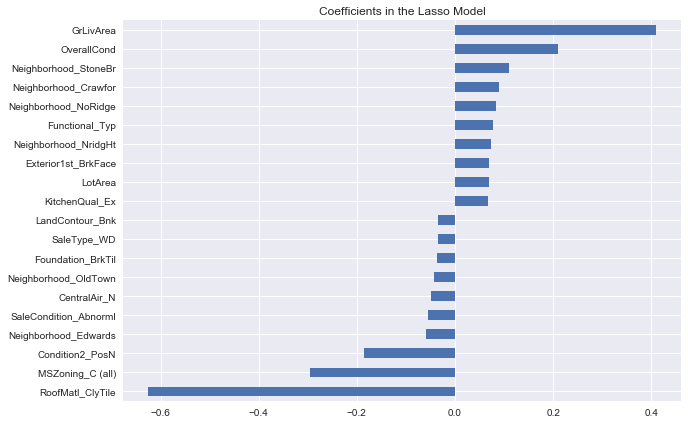

In [124]:
plt.rcParams['figure.figsize'] = (10.0, 7.0)
imp_coef.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")

## KNN Regression

In [125]:
from sklearn.neighbors import KNeighborsRegressor

knnreg = KNeighborsRegressor(n_neighbors = 5).fit(X_train, y_train)

#print(knnreg.predict(X_test))
print('R-squared train score: {:.3f}'
     .format(knnreg.score(X_train, y_train)))

R-squared train score: 0.725


In [128]:
alphas = [1,4,8,16,32,64]
cv_knn = [rmse_cv(KNeighborsRegressor(n_neighbors = alpha)).mean() 
            for alpha in alphas]

In [140]:
np.array(cv_knn).mean()

0.27848013624033818

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(C = 120).fit(train_x_std, y_train)
print('Wine dataset')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(clf.score(train_x_std, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(clf.score(test_x_std, y_test)))

In [ ]:
print('Logistic regression: effect of C regularization parameter\n')
for this_c in [0.1, 1, 100,500,1000]:
    linridge = LogisticRegression(C = this_c).fit(train_x_std, y_train)
    r2_train = linridge.score(train_x_std, y_train)
    r2_test = linridge.score(test_x_std, y_test)
    print('C = {:.2f}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_c, r2_train, r2_test))

In [ ]:
clf.predict([ 0.25892857,  0.21232877,  0.29      ,  0.08219178,  0.10517529,
        0.25352113,  0.21201413,  0.52202643,  0.51968504,  0.16564417,
        0.16923077])

## Linear SVC

In [ ]:
from sklearn.svm import LinearSVC

clf = LinearSVC().fit(train_x_std, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(train_x_std, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(test_x_std, y_test)))
print('Coefficients:\n', clf.coef_)
print('Intercepts:\n', clf.intercept_)

In [ ]:
data.quality.value_counts()

## Kernalized SVC

In [ ]:
from sklearn.svm import SVC
# Support Vector Classifier: RBF kernel
clf = SVC().fit(train_x_std, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(train_x_std, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(test_x_std, y_test)))

In [ ]:
# Support Vector Classifier: Poly kernel
clf = SVC(kernel = 'poly', degree = 3).fit(train_x_std, y_train)
print('Accuracy of Linear SVC classifier on training set: {:.2f}'
     .format(clf.score(train_x_std, y_train)))
print('Accuracy of Linear SVC classifier on test set: {:.2f}'
     .format(clf.score(test_x_std, y_test)))

In [ ]:
print('SVC RBF: effect of  regularization parameter gamma\n')
for this_gamma in [0.01, 1, 10,50,100,120,150]:
    clf = SVC(    kernel = 'rbf', gamma=this_gamma).fit(train_x_std, y_train)
    r2_train = clf.score(train_x_std, y_train)
    r2_test = clf.score(test_x_std, y_test)
    print('Gamma = {:.2f}, \
r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_gamma, r2_train, r2_test))


In [ ]:
print('SVC RBF: effect of  regularization parameter gamma and C \n')
for this_gamma in [1, 10,50,100]:
    for this_C in [0.1, 1, 15]:
        
        clf = SVC(    kernel = 'rbf', gamma=this_gamma, C = this_C).fit(train_x_std, y_train)
        r2_train = clf.score(train_x_std, y_train)
        r2_test = clf.score(test_x_std, y_test)
        print('Gamma = {:.2f},C = {:.2f} \
        r-squared training: {:.2f}, r-squared test: {:.2f}\n'
         .format(this_gamma,this_C, r2_train, r2_test))

## Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier

for this_depth in [2,4,8,16,20,25,26,27,28]:
    clf = DecisionTreeClassifier(max_depth = this_depth)
    dtree = clf.fit(X_train,y_train)
    print('Max depth: {:.2f} R Squared train data: {:.2f}, R Squared test data {:.2f}\n'.format(this_depth,dtree.score(X_train,y_train),dtree.score(X_test,y_test)))
    